<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prophet-라이브러리-사용" data-toc-modified-id="Prophet-라이브러리-사용-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prophet 라이브러리 사용</a></span></li><li><span><a href="#ARIMA-사용" data-toc-modified-id="ARIMA-사용-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ARIMA 사용</a></span><ul class="toc-item"><li><span><a href="#정상성(Stationary)-체크하기" data-toc-modified-id="정상성(Stationary)-체크하기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>정상성(Stationary) 체크하기</a></span></li><li><span><a href="#Auto-ARIMA-사용해-학습-및-예측" data-toc-modified-id="Auto-ARIMA-사용해-학습-및-예측-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Auto ARIMA 사용해 학습 및 예측</a></span></li></ul></li><li><span><a href="#머신러닝" data-toc-modified-id="머신러닝-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>머신러닝</a></span><ul class="toc-item"><li><span><a href="#1년치-교차검증-수행하는-함수-만들기(고전적-교차검증-방법)" data-toc-modified-id="1년치-교차검증-수행하는-함수-만들기(고전적-교차검증-방법)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>1년치 교차검증 수행하는 함수 만들기(고전적 교차검증 방법)</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Polynomial-Linear-Regression" data-toc-modified-id="Polynomial-Linear-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Polynomial Linear Regression</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#XGBoost-Regressor" data-toc-modified-id="XGBoost-Regressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>XGBoost Regressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#MLP-Regressor" data-toc-modified-id="MLP-Regressor-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>MLP Regressor</a></span></li></ul></li><li><span><a href="#PLS-Regression" data-toc-modified-id="PLS-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PLS Regression</a></span><ul class="toc-item"><li><span><a href="#Hybrid-Voting" data-toc-modified-id="Hybrid-Voting-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Hybrid Voting</a></span></li><li><span><a href="#PCA-수행-후-LightGBM" data-toc-modified-id="PCA-수행-후-LightGBM-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>PCA 수행 후 LightGBM</a></span></li><li><span><a href="#Deep-Learning---LSTM" data-toc-modified-id="Deep-Learning---LSTM-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Deep Learning - LSTM</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings(action='ignore')
os.chdir('/Users/younghun/Desktop/gitrepo/data/woochuri/')

df = pd.read_csv('./woochuri_final_data.csv')

print(df.shape)
df.head() # 한우 < 육우가격 이상치 데이터(2020-10-07일 1개)제외한 상태

(2915, 18)


,날짜,요일,일매출,설_추석_가중치,일반공휴일가중치,한우가격,육우가격,돼지탕박가격,평균상대습도,최소상대습도,평균기온,최고기온,최저기온,평균풍속,최대풍속,일사량,1시간최다일사량,일강수량
0,2013-01-07,Monday,422400,0,0,14548.0,9169.0,3140.0,66.4,32.0,-5.0,1.0,-10.7,1.0,2.7,10.99,2.06,0.0
1,2013-01-08,Tuesday,461900,0,0,15082.0,8105.0,3024.0,68.0,43.0,-4.2,1.9,-9.2,1.1,3.0,11.16,1.87,0.0
2,2013-01-09,Wednesday,492500,0,0,15030.0,9669.0,3096.0,59.5,39.0,-6.3,-1.9,-9.7,1.9,5.2,12.34,2.13,0.0
3,2013-01-10,Thursday,701300,0,0,15229.0,9674.0,3000.0,54.9,29.0,-7.9,-1.5,-13.8,1.1,3.1,12.69,2.15,0.0
4,2013-01-11,Friday,1035000,0,0,14920.0,8286.0,2963.0,70.0,50.0,-5.3,1.9,-12.8,0.9,1.9,11.05,1.99,0.0


## Prophet 라이브러리 사용

- 결측치 제거할 필요 X
- 독립변수 추가로 가능하지만 추가 시 미래의 Y값을 예측하기 위해 직전의 Y값을 사용하지 않고 추가된 독립변수만을 사용

In [2]:
from fbprophet import Prophet
fb_df = df[['날짜', '일매출']]

fb_df['일매출'] = fb_df['일매출'].replace(0, np.nan)
fb_df.isnull().sum()

날짜      0
일매출    86
dtype: int64

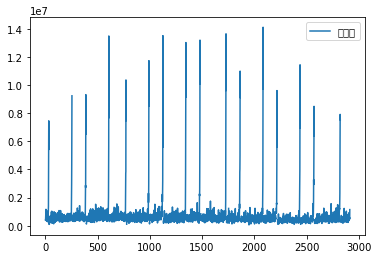

In [3]:
# 간단하게 시각화해보기
from matplotlib import pyplot
fb_df.plot()
pyplot.rc('font', family='AppleGothic')
pyplot.rcParams['axes.unicode_minus'] = False
pyplot.show()

In [ ]:
TRAIN_SPLIT = len(fb_df) - (365+1)
for i in range(0, len(fb_df)-1-TRAIN_SPLIT):
    print(TRAIN_SPLIT+i, TRAIN_SPLIT+i+1)

In [58]:
from sklearn.metrics import mean_absolute_error
import time

# 365일 1년치 교차검증 시키기
fb_df.columns = ['ds', 'y']
fb_df['ds'] = pd.to_datetime(fb_df['ds'])
TRAIN_SPLIT = len(fb_df) - (365+1)
index_lst = []
pred_lst = []

start_time = time.time()
for i in range(0, (len(fb_df)-(1+TRAIN_SPLIT))):
    if i % 100 == 0:
        print(f"{i}번째 교차 검증 시작")
    train = fb_df.iloc[:TRAIN_SPLIT+i]
    test = fb_df.iloc[TRAIN_SPLIT+i+1]
    test = pd.DataFrame(test.values.reshape(1, -1),
                       columns=train.columns)
    
    model = Prophet()
    model.fit(train)
    
    forecast = model.predict(test[['ds']]) # dataframe 형태로!
    y_pred = forecast['yhat'].values[0]
    pred_lst.append(y_pred)
    index_lst.append(TRAIN_SPLIT+i+1)
    
end_time = time.time() - start_time
print("교차검증 수행시간:", end_time)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0번째 교차 검증 시작


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

100번째 교차 검증 시작


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

200번째 교차 검증 시작


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

300번째 교차 검증 시작


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

교차검증 수행시간: 532.0279860496521


In [59]:
# 성능 측정은 y값이 NaN값이 아닌 데이터들로만 측정
test_df = fb_df.iloc[index_lst]
test_df = test_df.reset_index(drop=True)
not_nan_idx = test_df[~test_df['y'].isnull()].index
test_df = test_df[~test_df['y'].isnull()]
test_df['y_pred'] = pd.Series(pred_lst)[not_nan_idx]

test_df['score'] = 0
test_df.loc[abs(test_df['y']-test_df['y_pred']) < 1e5, 'score'] = 1

test_mae = mean_absolute_error(test_df['y'], test_df['y_pred'])
test_acc = test_df['score'].mean() * 100
print(f"# Test MAE: {int(test_mae/1e4): .0f}만원")
print(f"# Test Accuracy: {test_acc: .2f}")

test_df = test_df.set_index('ds')

# Test MAE:  40만원
# Test Accuracy:  37.29


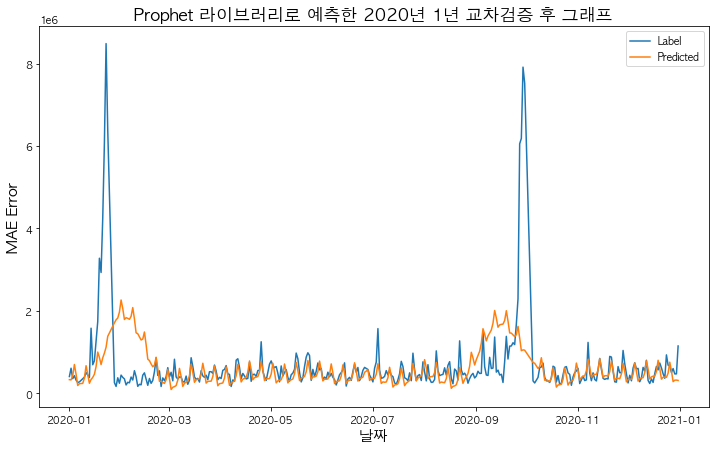

In [61]:
pyplot.figure(figsize=(12, 7))
pyplot.plot(test_df['y'], label='Label')
pyplot.plot(test_df['y_pred'], label='Predicted')
pyplot.title("Prophet 라이브러리로 예측한 2020년 1년 교차검증 후 그래프",
            fontsize=17)
pyplot.xlabel("날짜", fontsize=15)
pyplot.ylabel("MAE Error", fontsize=15)
pyplot.legend()
pyplot.show()

## ARIMA 사용

- 우선 일매출값의 정상성 확보
- 결측치 없애야 함 => 일매출값이 0인 값들 제외
- AR, MA 차수 범위 확인 후 Auto Arima 적용

### 정상성(Stationary) 체크하기

In [62]:
# 우선 휴무라서 매출이 0인 데이터는 제외하고 정상성 체크해보기
# 일매출이 0인 값들 제외
print("제거하기 전 shape:", df.shape)
non_zero = df[df['일매출'] != 0]

print("제거한 후 shape:", non_zero.shape)

제거하기 전 shape: (2915, 18)
제거한 후 shape: (2829, 18)


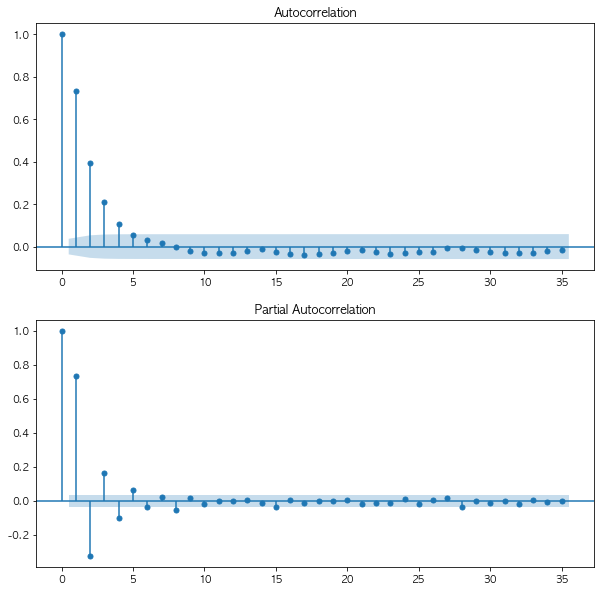

In [63]:
# ACF, PACF 그래프 그려보기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=1, squeeze=True)
plot_acf(non_zero['일매출'], ax=axes[0])
plot_pacf(non_zero['일매출'], ax=axes[1])
plt.show()

- ``일반 AR,MA 차수 체크``
    - ACF 함수 그래프에서 파란색 부분을 튀어나온 개수만큼 MA 수행
        - 0번 ~ 3번 또는 4번
    - PACF 함수 그래프에서 파란색 부분을 튀어나온 개수만큼 AR 수행
        - 0번 ~ 3번 또는 4번

- ``계절성 AR,MA 차수 체크``(lag=4의 배수일 때의 막대를 확인!)
    - ACF 함수 그래프에서 lag=4일 때 튀어나온 막대 개수만큼 MA 수행
        - 0번 ~ 1번
    - PACF 함수 그래프에서 lag=4일 때 튀어나온 막대 개수만큼 AR 수행
        - 0번 ~ 1번

In [64]:
# 해당 시계열 데이터의 정상성 통계적 검정하기
# 1. KPSS 검정 - 귀무가설 : 해당 시계열 데이터는 정상성이다.
from statsmodels.tsa.stattools import kpss
stats, p_value, n_lags, c_values = kpss(non_zero['일매출'])

print("KPSS 검정통계량:", stats)
print("P-value:", p_value)

if p_value < 0.05:
    print("귀무가설을 기각! 즉, 해당 데이터는 비정상성이다!")
else:
    print("귀무가설을 채택! 즉, 해당 데이터는 정상성이다!")

KPSS 검정통계량: 0.1493985081951096
P-value: 0.1
귀무가설을 채택! 즉, 해당 데이터는 정상성이다!


/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [65]:
# ADFuller Test도 수행 - 귀무가설 : 해당 시계열 데이터는 비정상성이다.
from statsmodels.tsa.stattools import adfuller

res = adfuller(non_zero['일매출'])
print("ADFuller 검정통계량:", res[0])
print("P-value:", res[1])

if res[1] < 0.05:
    print("귀무가설을 기각! 즉, 해당 데이터는 정상성이다!")
else:
    print("귀무가설을 채택! 즉, 해당 데이터는 비정상성이다!")

ADFuller 검정통계량: -16.731526931101694
P-value: 1.3818258984652357e-29
귀무가설을 기각! 즉, 해당 데이터는 정상성이다!


### Auto ARIMA 사용해 학습 및 예측

- 우선 1년치 365일 데이터를 하나의 검증 데이터로 사용해서 한 번에 365일치 데이터를 예측해서 최적의 ARIMA 모델을 찾기(시간 복잡도 감안..)
- 그리고 최적의 ARIMA 모델을 이용해서 365일 하루씩 고전적인 방법으로 교차 검증 시도(365일 1년치)

In [71]:
from pmdarima.arima import auto_arima

non_zero['날짜'] = pd.to_datetime(non_zero['날짜'])
non_zero = non_zero.set_index('날짜')

In [75]:
# Split train, test
splits = non_zero.shape[0] - 365

train = non_zero[['일매출']][:splits]
test = non_zero[['일매출']][splits:]

# p = AR, q = MA, d = 차분
# 대문자 P,D,Q 파라미터는 계절적 요소알아보는 것!
# m = 계절 차분에 대한 periods 설정인데, daily=7로 설정!
arima_model = auto_arima(train, start_p=0, d=0, start_q=0,
                        max_p=4, max_d=1, max_q=4,
                        start_P=0, D=0, start_Q=0,
                        max_P=1, max_D=5, max_Q=1,
                        m=7, seasonal=True,
                        error_action='warn', trace=True,
                        stepwise=True, random_state=42)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=75847.826, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=73972.101, Time=0.37 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=74134.573, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=76653.545, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=73970.900, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=73972.106, Time=0.29 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=73974.095, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=73686.105, Time=0.16 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=73685.715, Time=0.44 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=73687.611, Time=0.70 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=73685.627, Time=0.31 sec
 ARIMA(3,0,0)(0,0,1)[7] intercept   : AIC=73613.159, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[7] intercept   : AIC=73611.902, Time=0.22 sec
 ARIMA(3,0,0)(1,0,0)[7] intercept   : AIC=73613.154, Time=0.67 sec
 ARIMA(3,0,0)(1,0,1

In [78]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 2464
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood              -36779.184
Date:                           Sun, 21 Mar 2021   AIC                          73570.368
Time:                                   14:34:00   BIC                          73605.225
Sample:                                        0   HQIC                         73583.032
                                          - 2464                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.315e+05   4.57e-07   5.06e+11      0.000    2.31e+05    2.31e+05
ar.L1          0.5085      0.007     71.803      0.000       0.495       0.522
ma.L1          0.5558      0.006     88.760      0.000       0.543       0.568
ar.S.L7        0.3548      0.080      4.440      0.000       0.198       0.511
ma.S.L7       -0.3252      0.088     -3.708      0.000      -0.497      -0.153
sigma2       5.52e+11    1.8e-12   3.07e+23      0.000    5.52e+11    5.52e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            329028.90
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             4.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.84e+37. Standard errors may be unstable.
"""

In [89]:
test['y_pred'] = arima_model.predict(n_periods=test.shape[0])
test['score'] = 0
test.loc[abs(test['일매출']-test['y_pred']) < 1e5, 'score'] = 1

test_mae = mean_absolute_error(test['일매출'], test['y_pred'])
test_acc = test['score'].mean() * 100

print(f"# Test MAE: {test_mae/1e4 : .0f}만원")
print(f"# Test Accuracy: {test_acc :.2f}%")

# Test MAE:  43만원
# Test Accuracy: 11.51%


In [105]:
# 위에서 찾은 최적의 SARIMA 모델로 교차검증 수행
from pmdarima.arima import ARIMA

# 365일 1년치 교차검증 시키기
cross_df = non_zero[['일매출']]
TRAIN_SPLIT = len(cross_df) - (365+1)
index_lst = []
pred_lst = []

start_time = time.time()
for i in range(0, (len(non_zero)-(1+TRAIN_SPLIT))):
    if i % 100 == 0:
        print('#', i, "번째 교차검증 수행")
    start_time = time.time()

    train = cross_df.iloc[:TRAIN_SPLIT+i]
    test = cross_df.iloc[TRAIN_SPLIT+i+1]
    test = pd.DataFrame(test.values.reshape(1, -1),
                       columns=train.columns)
    
    model = ARIMA(order=(1, 0, 1),
                 seasonal_order=(1, 0, 1, 7))
    model.fit(train.values)
    
    forecast = model.predict(n_periods=1)
    y_pred = forecast[0]
    pred_lst.append(y_pred)
    index_lst.append(TRAIN_SPLIT+i+1)
    
end_time = time.time() - start_time
print("교차검증 수행시간:", end_time)

# 0 번째 교차검증 수행
# 100 번째 교차검증 수행
# 200 번째 교차검증 수행
# 300 번째 교차검증 수행
교차검증 수행시간: 0.8243520259857178


In [125]:
test_idx = non_zero[len(non_zero)-365:].index
test_df = pd.DataFrame(data=non_zero[len(non_zero)-365:]['일매출'],
                      index=test_idx)
test_df['y_pred'] = np.array(pred_lst)

test_df['score'] = 0
test_df.loc[abs(test_df['일매출']-test_df['y_pred']) < 1e5, 'score'] = 1

test_mae = mean_absolute_error(test_df['일매출'], test_df['y_pred'])
test_acc = test_df['score'].mean() * 100

print(f"# Test MAE: {test_mae/1e4: .0f}만원")
print(f"# Test Accuracy: {test_acc: .2f}%")

# Test MAE:  40만원
# Test Accuracy:  23.29%


## 머신러닝

### 1년치 교차검증 수행하는 함수 만들기(고전적 교차검증 방법)

- 헷갈리니 다시 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings(action='ignore')
os.chdir('/Users/younghun/Desktop/gitrepo/data/woochuri/')

df = pd.read_csv('./woochuri_final_data.csv')
df.shape

(2916, 18)

In [2]:
# 다중공선성 변수 제거
multi_cols = ['최소상대습도', '최저기온', '평균기온', '1시간최다일사량']
dataset = df.drop(multi_cols, axis=1)
# 날짜 인덱스로 옮기기
dataset['날짜'] = pd.to_datetime(dataset['날짜'])
dataset = dataset.set_index('날짜')

In [3]:
# 우선 매출이 0인 값들 요일 평균값으로 대체
non_zero_sales = dataset[dataset['일매출'] != 0]
days = non_zero_sales.groupby('요일')['일매출'].mean().index
means = non_zero_sales.groupby('요일')['일매출'].mean().values
weekdays_means = dict(zip(days, means))

def replace_zero_sales(df):
    if df['일매출'] == 0:
        df['일매출'] = weekdays_means[df['요일']]
    return df

dataset = dataset.apply(replace_zero_sales, axis=1)

# 요일변수 요일별 매출 평균값 가중치로 변경
total = dataset.groupby('요일')['일매출'].mean().values.sum()
weekdays = dataset.groupby('요일')['일매출'].mean().index
values = np.round(dataset.groupby('요일')['일매출'].mean().values / total * 100, 2)
weekdays_dict = dict(zip(weekdays, values))

dataset['요일'] = dataset['요일'].map(weekdays_dict)

In [18]:
#### 1년치 교차검증 함수 만들기 ####
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import time
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# dataframe에는 전처리된 데이터프레임 넣어야 함!
def evaluate_cv_predict(dataframe, regressor):
    start_time = time.time()

    # 교차검증 1번 수행할 때마다 예측값 담을 리스트
    train_mae_lst = []  # 학습 데이터에 대한 MAE 담기 for overfitting 여부 확인
    test_pred_lst = []  # 비교하기 위해 1개의 미래 데이터에 대한 예측값 담기
    test_y_lst = []     # 비교하기 위해 1개의 미래 데이터에 대한 실제값 담기


    TRAIN_SPLIT = len(dataset) - 365
    for i in range(0, len(dataset)-(TRAIN_SPLIT)):
        if i % 10 == 0 and i > 0:
            print(f"## {i}번째 교차검증 수행")
        dataset['target'] = np.append(np.array(dataset['일매출'][1:]), 0)
        train = dataset.iloc[:i+TRAIN_SPLIT-1] # dataframe
        test = dataset.iloc[i+TRAIN_SPLIT-1] # Series
        test_y_lst.append(test[-1]) # Target값 저장
        test = pd.DataFrame(data=test.values.reshape(1, -1),
                           columns=test.index) # Convert Series to Dataframe
        X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

        # Scaling
        scaler = MinMaxScaler()
        no_scale_cols = ['요일', '설_추석_가중치', '일반공휴일가중치']
        scale_cols = ['일매출', '한우가격', '육우가격', '돼지탕박가격', '평균상대습도', '최고기온', '평균풍속', '최대풍속',
                      '일사량', '일강수량']

        X_train_scale = X_train[scale_cols]
        X_train_no_scale = X_train[no_scale_cols]
        X_test_scale = X_test[scale_cols]
        X_test_no_scale = X_test[no_scale_cols]

        X_train_scale = pd.DataFrame(scaler.fit_transform(X_train_scale),
                                     columns=X_train_scale.columns,
                                     index=X_train_scale.index)
        X_test_scale = pd.DataFrame(scaler.transform(X_test_scale),
                                    columns=X_test_scale.columns,
                                    index=X_test_scale.index)

        X_train = pd.concat([X_train_scale, X_train_no_scale], axis=1)
        X_test = pd.concat([X_test_scale, X_test_no_scale], axis=1)

        # fitting
        model = regressor
        model.fit(X_train, y_train)
        # predict
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        # Evaluate
        train_mae = mean_absolute_error(y_train, train_pred)
        train_mae_lst.append(train_mae)
        test_pred_lst.append(test_pred[0])
    end_time = time.time() - start_time
    
    # 364번 각 교차검증할 때마다 담은 Train 데이터에 대한 MAE값들의 평균 값
    TRAIN_MAE = np.array(train_mae_lst).mean()
    TEST_DF = pd.DataFrame()
    TEST_DF['y_true'] = np.array(test_y_lst)
    TEST_DF['y_pred'] = np.array(test_pred_lst)

    TEST_DF['score'] = 0
    TEST_DF.loc[abs(TEST_DF['y_true']-TEST_DF['y_pred']) < 1e5, 'score'] = 1
    TEST_DF = TEST_DF.set_index(dataset.iloc[len(dataset)-365:].index)
    TEST_MAE = mean_absolute_error(TEST_DF['y_true'], TEST_DF['y_pred'])
    TEST_ACC = TEST_DF['score'].mean() * 100

    print("## 365번 교차검증 수행 시간:", end_time)
    print()
    print(f"## 365번 교차검증에 대한 Train 데이터 MAE:{TRAIN_MAE/1e4: .0f}만원")
    print()
    print(f"## 365번 교차검증에 대한 Test 데이터 MAE:{TEST_MAE/1e4: .0f}만원")
    print()
    print(f"## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율:{TEST_ACC: .2f}%")

    # Graph label and prediction
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=TEST_DF[['y_true', 'y_pred']])
    plt.title("실제값과 예측값 Line Graph", fontsize=20)
    plt.xlabel("날짜", fontsize=17)
    plt.ylabel("MAE Error", fontsize=17)
    plt.legend(['Label', 'Predicted'])
    plt.show()
    
    return TEST_DF, TRAIN_MAE

In [222]:
# 1년치 교차검증 함수 만들기
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestRegressor
# import time

# start_time = time.time()

# # 교차검증 1번 수행할 때마다 예측값 담을 리스트
# train_mae_lst = []  # 학습 데이터에 대한 MAE 담기 for overfitting 여부 확인
# test_pred_lst = []  # 비교하기 위해 1개의 미래 데이터에 대한 예측값 담기
# test_y_lst = []     # 비교하기 위해 1개의 미래 데이터에 대한 실제값 담기


# TRAIN_SPLIT = len(dataset) - 365
# for i in range(0, len(dataset)-(TRAIN_SPLIT)):
#     if i+1 % 10 == 0:
#         print(f"## {i+1}번째 교차검증 수행")
#     dataset['target'] = np.append(np.array(dataset['일매출'][1:]), 0)
#     train = dataset.iloc[:i+TRAIN_SPLIT-1] # dataframe
#     test = dataset.iloc[i+TRAIN_SPLIT-1] # Series
#     test_y_lst.append(test[-1]) # Target값 저장
#     test = pd.DataFrame(data=test.values.reshape(1, -1),
#                        columns=test.index) # Convert Series to Dataframe
#     X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
#     X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

#     # Scaling
#     scaler = MinMaxScaler()
#     no_scale_cols = ['요일', '설_추석_가중치', '일반공휴일가중치']
#     scale_cols = ['일매출', '한우가격', '육우가격', '돼지탕박가격', '평균상대습도', '최고기온', '평균풍속', '최대풍속',
#                   '일사량', '일강수량']
    
#     X_train_scale = X_train[scale_cols]
#     X_train_no_scale = X_train[no_scale_cols]
#     X_test_scale = X_test[scale_cols]
#     X_test_no_scale = X_test[no_scale_cols]

#     X_train_scale = pd.DataFrame(scaler.fit_transform(X_train_scale),
#                                  columns=X_train_scale.columns,
#                                  index=X_train_scale.index)
#     X_test_scale = pd.DataFrame(scaler.transform(X_test_scale),
#                                 columns=X_test_scale.columns,
#                                 index=X_test_scale.index)

#     X_train = pd.concat([X_train_scale, X_train_no_scale], axis=1)
#     X_test = pd.concat([X_test_scale, X_test_no_scale], axis=1)
    
#     # fitting
#     model = RandomForestRegressor()
#     model.fit(X_train, y_train)
#     # predict
#     train_pred = model.predict(X_train)
#     test_pred = model.predict(X_test)
#     # Evaluate
#     train_mae = mean_absolute_error(y_train, train_pred)
#     train_mae_lst.append(train_mae)
#     test_pred_lst.append(test_pred[0])
    
# # 364번 각 교차검증할 때마다 담은 Train 데이터에 대한 MAE값들의 평균 값
# TRAIN_MAE = np.array(train_mae_lst).mean()
# TEST_DF = pd.DataFrame()
# TEST_DF['y_true'] = np.array(test_y_lst)
# TEST_DF['y_pred'] = np.array(test_pred_lst)

# TEST_DF['score'] = 0
# TEST_DF.loc[abs(TEST_DF['y_true']-TEST_DF['y_pred']) < 1e5, 'score'] = 1
# TEST_DF = TEST_DF.set_index(dataset.iloc[len(dataset)-365:].index)
# TEST_MAE = mean_absolute_error(TEST_DF['y_true'], TEST_DF['y_pred'])
# TEST_ACC = TEST_DF['score'].mean() * 100

# print(f"## 365번 교차검증에 대한 Train 데이터 MAE:{TRAIN_MAE/1e4: .0f}만원")
# print()
# print(f"## 365번 교차검증에 대한 Test 데이터 MAE:{TEST_MAE/1e4: .0f}만원")
# print()
# print(f"## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율:{TEST_ACC: .2f}%")

# # Graph label and prediction
# plt.figure(figsize=(12, 7))
# sns.lineplot(data=TEST_DF[['y_true', 'y_pred']])
# plt.title("실제값과 예측값 Line Graph", fontsize=20)
# plt.xlabel("날짜", fontsize=17)
# plt.ylabel("MAE Error", fontsize=17)
# plt.legend(['Label', 'Predicted'])
# plt.show()

## 0번째 교차검증 수행
## 10번째 교차검증 수행
## 20번째 교차검증 수행
## 30번째 교차검증 수행
## 40번째 교차검증 수행
## 50번째 교차검증 수행
## 60번째 교차검증 수행
## 70번째 교차검증 수행
## 80번째 교차검증 수행
## 90번째 교차검증 수행
## 100번째 교차검증 수행
## 110번째 교차검증 수행
## 120번째 교차검증 수행
## 130번째 교차검증 수행
## 140번째 교차검증 수행
## 150번째 교차검증 수행
## 160번째 교차검증 수행
## 170번째 교차검증 수행
## 180번째 교차검증 수행
## 190번째 교차검증 수행
## 200번째 교차검증 수행
## 210번째 교차검증 수행
## 220번째 교차검증 수행
## 230번째 교차검증 수행
## 240번째 교차검증 수행
## 250번째 교차검증 수행
## 260번째 교차검증 수행
## 270번째 교차검증 수행
## 280번째 교차검증 수행
## 290번째 교차검증 수행
## 300번째 교차검증 수행
## 310번째 교차검증 수행
## 320번째 교차검증 수행
## 330번째 교차검증 수행
## 340번째 교차검증 수행
## 350번째 교차검증 수행
## 360번째 교차검증 수행


## 365번 교차검증에 대한 Train 데이터 MAE: 7만원

## 365번 교차검증에 대한 Test 데이터 MAE: 21만원

## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율: 38.90%


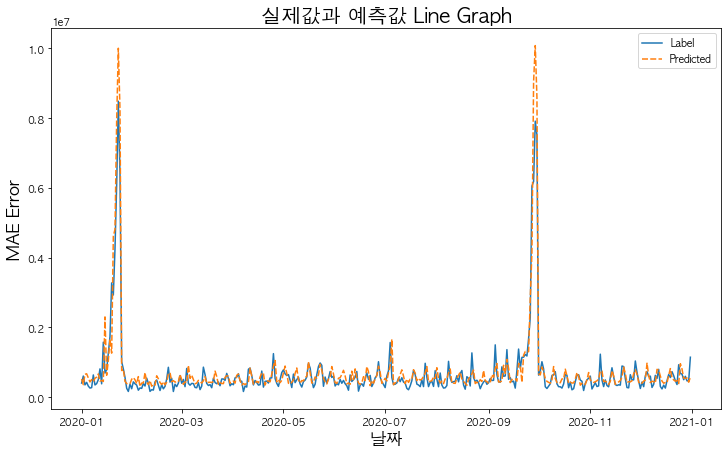

In [258]:
# # 364번 각 교차검증할 때마다 담은 Train 데이터에 대한 MAE값들의 평균 값
# TRAIN_MAE = np.array(train_mae_lst).mean()
# TEST_DF = pd.DataFrame()
# TEST_DF['y_true'] = np.array(test_y_lst)
# TEST_DF['y_pred'] = np.array(test_pred_lst)

# TEST_DF['score'] = 0
# TEST_DF.loc[abs(TEST_DF['y_true']-TEST_DF['y_pred']) < 1e5, 'score'] = 1
# TEST_DF = TEST_DF.set_index(dataset.iloc[len(dataset)-365:].index)
# TEST_MAE = mean_absolute_error(TEST_DF['y_true'], TEST_DF['y_pred'])
# TEST_ACC = TEST_DF['score'].mean() * 100

# print(f"## 365번 교차검증에 대한 Train 데이터 MAE:{TRAIN_MAE/1e4: .0f}만원")
# print()
# print(f"## 365번 교차검증에 대한 Test 데이터 MAE:{TEST_MAE/1e4: .0f}만원")
# print()
# print(f"## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율:{TEST_ACC: .2f}%")

# # Graph label and prediction
# plt.figure(figsize=(12, 7))
# sns.lineplot(data=TEST_DF[['y_true', 'y_pred']])
# plt.title("실제값과 예측값 Line Graph", fontsize=20)
# plt.xlabel("날짜", fontsize=17)
# plt.ylabel("MAE Error", fontsize=17)
# plt.legend(['Label', 'Predicted'])
# plt.show()

### Linear Regression

## 365번 교차검증 수행 시간: 4.717142105102539

## 365번 교차검증에 대한 Train 데이터 MAE: 28만원

## 365번 교차검증에 대한 Test 데이터 MAE: 28만원

## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율: 30.68%


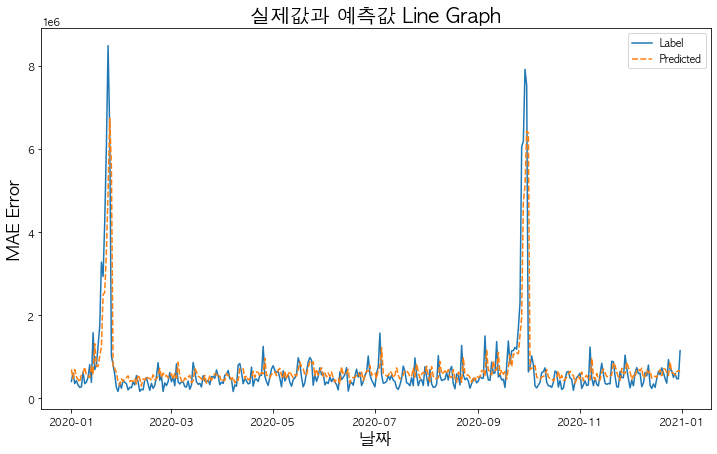

In [261]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()

test_df, train_cv_mae = evaluate_cv_predict(dataframe=dataset, regressor=lr_reg)

### Polynomial Linear Regression

## 365번 교차검증 수행 시간: 8.714577913284302

## 365번 교차검증에 대한 Train 데이터 MAE: 23만원

## 365번 교차검증에 대한 Test 데이터 MAE: 25만원

## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율: 36.16%


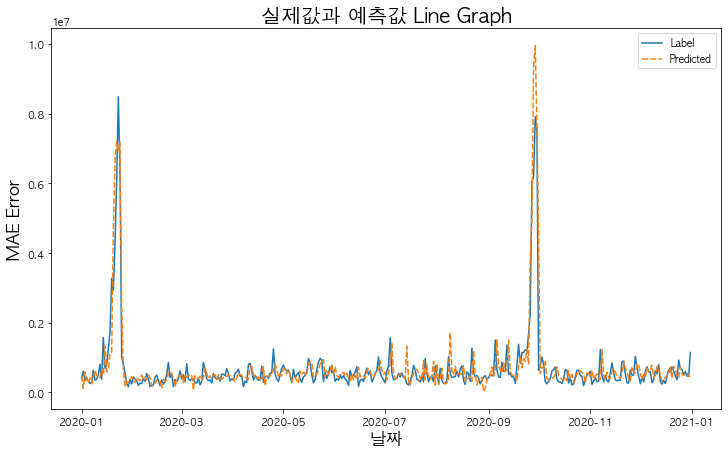

In [262]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# 1차적인 모델링 수행했을 때 2차항이 가장 최적이었으므로 2차항으로 설정
poly_reg = Pipeline([('poly', PolynomialFeatures(degree=2,
                                                include_bias=True)),
                    ('linear', LinearRegression())])

test_df, train_cv_mae = evaluate_cv_predict(dataframe=dataset,
                                           regressor=poly_reg)

### Random Forest Regressor

## 10번째 교차검증 수행
## 20번째 교차검증 수행
## 30번째 교차검증 수행
## 40번째 교차검증 수행
## 50번째 교차검증 수행
## 60번째 교차검증 수행
## 70번째 교차검증 수행
## 80번째 교차검증 수행
## 90번째 교차검증 수행
## 100번째 교차검증 수행
## 110번째 교차검증 수행
## 120번째 교차검증 수행
## 130번째 교차검증 수행
## 140번째 교차검증 수행
## 150번째 교차검증 수행
## 160번째 교차검증 수행
## 170번째 교차검증 수행
## 180번째 교차검증 수행
## 190번째 교차검증 수행
## 200번째 교차검증 수행
## 210번째 교차검증 수행
## 220번째 교차검증 수행
## 230번째 교차검증 수행
## 240번째 교차검증 수행
## 250번째 교차검증 수행
## 260번째 교차검증 수행
## 270번째 교차검증 수행
## 280번째 교차검증 수행
## 290번째 교차검증 수행
## 300번째 교차검증 수행
## 310번째 교차검증 수행
## 320번째 교차검증 수행
## 330번째 교차검증 수행
## 340번째 교차검증 수행
## 350번째 교차검증 수행
## 360번째 교차검증 수행
## 365번 교차검증 수행 시간: 609.8276000022888

## 365번 교차검증에 대한 Train 데이터 MAE: 7만원

## 365번 교차검증에 대한 Test 데이터 MAE: 21만원

## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율: 41.37%


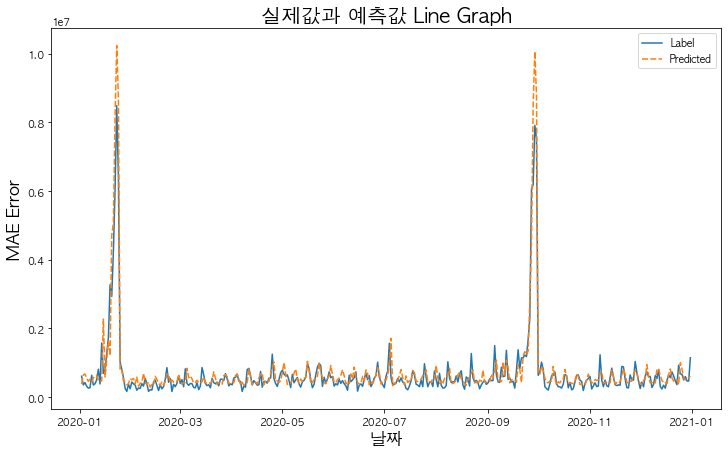

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

test_df, train_cv_mae = evaluate_cv_predict(dataframe=dataset,
                                           regressor=rf_reg)

### XGBoost Regressor

[19:29:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

## 70번째 교차검증 수행
[19:29:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:42] WARNING: src/objective/regression_obj.cu:152:

## 140번째 교차검증 수행
[19:29:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:58] WARNING: src/objective/regression_obj.cu:152

## 210번째 교차검증 수행
[19:30:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:15] WARNING: src/objective/regression_obj.cu:152

## 280번째 교차검증 수행
[19:30:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:32] WARNING: src/objective/regression_obj.cu:152

## 350번째 교차검증 수행
[19:30:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:49] WARNING: src/objective/regression_obj.cu:152

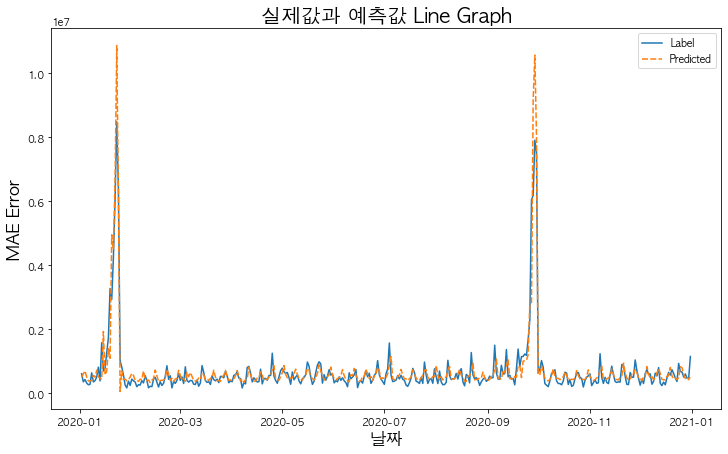

In [20]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()

test_df, train_cv_mae = evaluate_cv_predict(dataframe=dataset,
                                          regressor=xgb_reg)

### LightGBM

## 10번째 교차검증 수행
## 20번째 교차검증 수행
## 30번째 교차검증 수행
## 40번째 교차검증 수행
## 50번째 교차검증 수행
## 60번째 교차검증 수행
## 70번째 교차검증 수행
## 80번째 교차검증 수행
## 90번째 교차검증 수행
## 100번째 교차검증 수행
## 110번째 교차검증 수행
## 120번째 교차검증 수행
## 130번째 교차검증 수행
## 140번째 교차검증 수행
## 150번째 교차검증 수행
## 160번째 교차검증 수행
## 170번째 교차검증 수행
## 180번째 교차검증 수행
## 190번째 교차검증 수행
## 200번째 교차검증 수행
## 210번째 교차검증 수행
## 220번째 교차검증 수행
## 230번째 교차검증 수행
## 240번째 교차검증 수행
## 250번째 교차검증 수행
## 260번째 교차검증 수행
## 270번째 교차검증 수행
## 280번째 교차검증 수행
## 290번째 교차검증 수행
## 300번째 교차검증 수행
## 310번째 교차검증 수행
## 320번째 교차검증 수행
## 330번째 교차검증 수행
## 340번째 교차검증 수행
## 350번째 교차검증 수행
## 360번째 교차검증 수행
## 365번 교차검증 수행 시간: 46.27240180969238

## 365번 교차검증에 대한 Train 데이터 MAE: 14만원

## 365번 교차검증에 대한 Test 데이터 MAE: 22만원

## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율: 41.37%


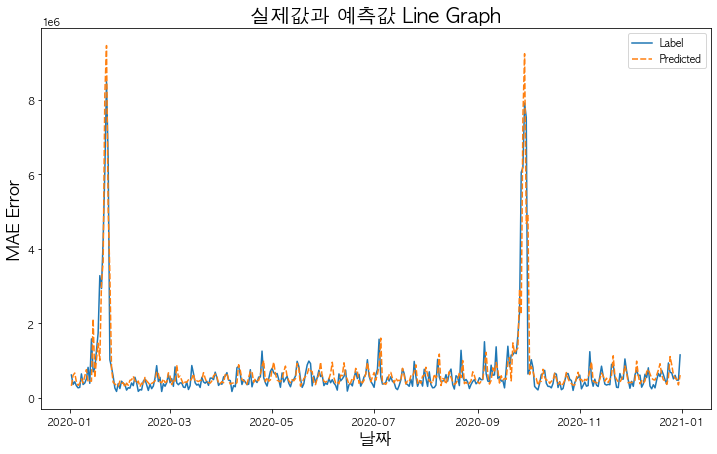

In [21]:
from lightgbm import LGBMRegressor

lgb_reg = LGBMRegressor()

test_df, train_cv_mae = evaluate_cv_predict(dataframe=dataset,
                                          regressor=lgb_reg)

### MLP Regressor

## 10번째 교차검증 수행
## 20번째 교차검증 수행
## 30번째 교차검증 수행
## 40번째 교차검증 수행
## 50번째 교차검증 수행
## 60번째 교차검증 수행
## 70번째 교차검증 수행
## 80번째 교차검증 수행
## 90번째 교차검증 수행
## 100번째 교차검증 수행
## 110번째 교차검증 수행
## 120번째 교차검증 수행
## 130번째 교차검증 수행
## 140번째 교차검증 수행
## 150번째 교차검증 수행
## 160번째 교차검증 수행
## 170번째 교차검증 수행
## 180번째 교차검증 수행
## 190번째 교차검증 수행
## 200번째 교차검증 수행
## 210번째 교차검증 수행
## 220번째 교차검증 수행
## 230번째 교차검증 수행
## 240번째 교차검증 수행
## 250번째 교차검증 수행
## 260번째 교차검증 수행
## 270번째 교차검증 수행
## 280번째 교차검증 수행
## 290번째 교차검증 수행
## 300번째 교차검증 수행
## 310번째 교차검증 수행
## 320번째 교차검증 수행
## 330번째 교차검증 수행
## 340번째 교차검증 수행
## 350번째 교차검증 수행
## 360번째 교차검증 수행
## 365번 교차검증 수행 시간: 375.87828612327576

## 365번 교차검증에 대한 Train 데이터 MAE: 71만원

## 365번 교차검증에 대한 Test 데이터 MAE: 66만원

## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율: 0.00%


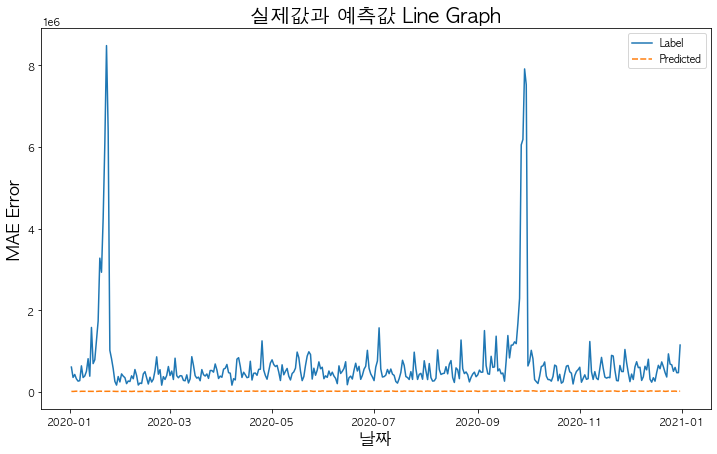

In [22]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor()

test_df, test_cv_mae = evaluate_cv_predict(dataframe=dataset,
                                          regressor=mlp_reg)

## PLS Regression

- 최적의 주성분 개수는 3개

## 10번째 교차검증 수행
## 20번째 교차검증 수행
## 30번째 교차검증 수행
## 40번째 교차검증 수행
## 50번째 교차검증 수행
## 60번째 교차검증 수행
## 70번째 교차검증 수행
## 80번째 교차검증 수행
## 90번째 교차검증 수행
## 100번째 교차검증 수행
## 110번째 교차검증 수행
## 120번째 교차검증 수행
## 130번째 교차검증 수행
## 140번째 교차검증 수행
## 150번째 교차검증 수행
## 160번째 교차검증 수행
## 170번째 교차검증 수행
## 180번째 교차검증 수행
## 190번째 교차검증 수행
## 200번째 교차검증 수행
## 210번째 교차검증 수행
## 220번째 교차검증 수행
## 230번째 교차검증 수행
## 240번째 교차검증 수행
## 250번째 교차검증 수행
## 260번째 교차검증 수행
## 270번째 교차검증 수행
## 280번째 교차검증 수행
## 290번째 교차검증 수행
## 300번째 교차검증 수행
## 310번째 교차검증 수행
## 320번째 교차검증 수행
## 330번째 교차검증 수행
## 340번째 교차검증 수행
## 350번째 교차검증 수행
## 360번째 교차검증 수행
## 365번 교차검증 수행 시간: 5.502496004104614

## 365번 교차검증에 대한 Train 데이터 MAE: 29만원

## 365번 교차검증에 대한 Test 데이터 MAE: 29만원

## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율: 26.03%


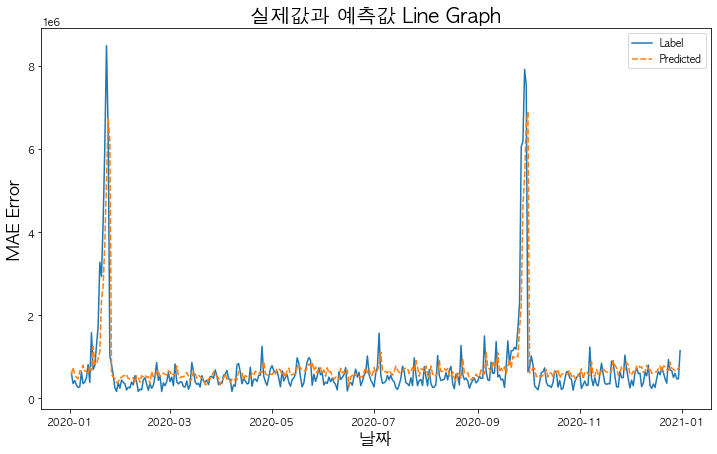

In [23]:
from sklearn.cross_decomposition import PLSRegression

pls_reg = PLSRegression(n_components=3)

test_df, train_cv_mae = evaluate_cv_predict(dataframe=dataset,
                                          regressor=pls_reg)

### Hybrid Voting

[19:52:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

## 70번째 교차검증 수행
[19:55:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:22] WARNING: src/objective/regression_obj.cu:152:

## 140번째 교차검증 수행
[19:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:35] WARNING: src/objective/regression_obj.cu:152

## 210번째 교차검증 수행
[19:59:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:49] WARNING: src/objective/regression_obj.cu:152

## 280번째 교차검증 수행
[20:01:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:05] WARNING: src/objective/regression_obj.cu:152

## 350번째 교차검증 수행
[20:04:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:26] WARNING: src/objective/regression_obj.cu:152

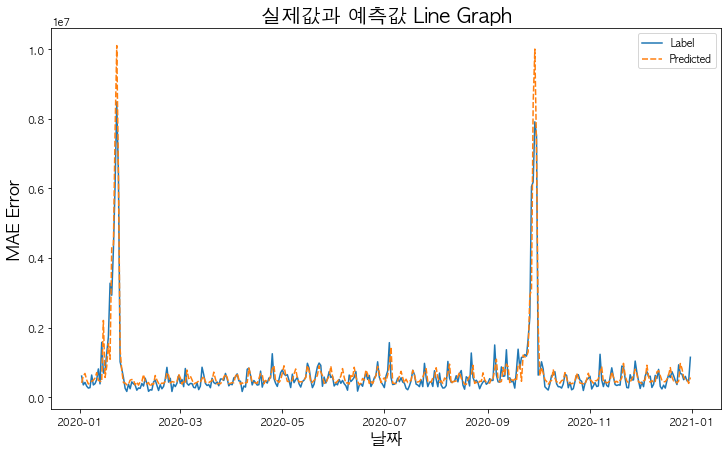

In [24]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

hb_vote = VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                                     ('xgb', XGBRegressor()),
                                     ('lgbm', LGBMRegressor())])

test_df, train_cv_mae = evaluate_cv_predict(dataframe=dataset,
                                          regressor=hb_vote)

### PCA 수행 후 LightGBM

- 성능이 상위 모델에 속하여 속도가 빠른 LightGBM으로 선정
- 최적의 주성분 개수 7개로 선정

## 10번째 교차검증 수행
## 20번째 교차검증 수행
## 30번째 교차검증 수행
## 40번째 교차검증 수행
## 50번째 교차검증 수행
## 60번째 교차검증 수행
## 70번째 교차검증 수행
## 80번째 교차검증 수행
## 90번째 교차검증 수행
## 100번째 교차검증 수행
## 110번째 교차검증 수행
## 120번째 교차검증 수행
## 130번째 교차검증 수행
## 140번째 교차검증 수행
## 150번째 교차검증 수행
## 160번째 교차검증 수행
## 170번째 교차검증 수행
## 180번째 교차검증 수행
## 190번째 교차검증 수행
## 200번째 교차검증 수행
## 210번째 교차검증 수행
## 220번째 교차검증 수행
## 230번째 교차검증 수행
## 240번째 교차검증 수행
## 250번째 교차검증 수행
## 260번째 교차검증 수행
## 270번째 교차검증 수행
## 280번째 교차검증 수행
## 290번째 교차검증 수행
## 300번째 교차검증 수행
## 310번째 교차검증 수행
## 320번째 교차검증 수행
## 330번째 교차검증 수행
## 340번째 교차검증 수행
## 350번째 교차검증 수행
## 360번째 교차검증 수행
## 365번 교차검증 수행 시간: 40.936474084854126

## 365번 교차검증에 대한 Train 데이터 MAE: 18만원

## 365번 교차검증에 대한 Test 데이터 MAE: 27만원

## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율: 34.52%


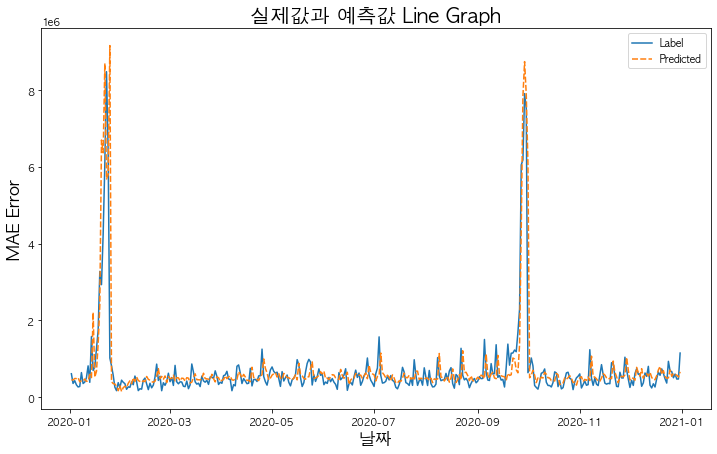

In [26]:
from sklearn.decomposition import PCA
from lightgbm import LGBMRegressor

# dataframe에는 전처리된 데이터프레임 넣어야 함!
def evaluate_cv_pca_predict(dataframe, regressor):
    start_time = time.time()

    # 교차검증 1번 수행할 때마다 예측값 담을 리스트
    train_mae_lst = []  # 학습 데이터에 대한 MAE 담기 for overfitting 여부 확인
    test_pred_lst = []  # 비교하기 위해 1개의 미래 데이터에 대한 예측값 담기
    test_y_lst = []     # 비교하기 위해 1개의 미래 데이터에 대한 실제값 담기


    TRAIN_SPLIT = len(dataset) - 365
    for i in range(0, len(dataset)-(TRAIN_SPLIT)):
        if i % 10 == 0 and i > 0:
            print(f"## {i}번째 교차검증 수행")
        dataset['target'] = np.append(np.array(dataset['일매출'][1:]), 0)
        train = dataset.iloc[:i+TRAIN_SPLIT-1] # dataframe
        test = dataset.iloc[i+TRAIN_SPLIT-1] # Series
        test_y_lst.append(test[-1]) # Target값 저장
        test = pd.DataFrame(data=test.values.reshape(1, -1),
                           columns=test.index) # Convert Series to Dataframe
        X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

        # PCA
        pca = PCA(n_components=7)
        pca_cols = [f"PCA{p+1}" for p in range(0, 7)]
        X_train = pd.DataFrame(pca.fit_transform(X_train),
                              columns=pca_cols,
                              index=X_train.index)
        X_test = pd.DataFrame(pca.transform(X_test),
                             columns=pca_cols,
                             index=X_test.index)

        # fitting
        model = regressor
        model.fit(X_train, y_train)
        # predict
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        # Evaluate
        train_mae = mean_absolute_error(y_train, train_pred)
        train_mae_lst.append(train_mae)
        test_pred_lst.append(test_pred[0])
    end_time = time.time() - start_time
    
    # 364번 각 교차검증할 때마다 담은 Train 데이터에 대한 MAE값들의 평균 값
    TRAIN_MAE = np.array(train_mae_lst).mean()
    TEST_DF = pd.DataFrame()
    TEST_DF['y_true'] = np.array(test_y_lst)
    TEST_DF['y_pred'] = np.array(test_pred_lst)

    TEST_DF['score'] = 0
    TEST_DF.loc[abs(TEST_DF['y_true']-TEST_DF['y_pred']) < 1e5, 'score'] = 1
    TEST_DF = TEST_DF.set_index(dataset.iloc[len(dataset)-365:].index)
    TEST_MAE = mean_absolute_error(TEST_DF['y_true'], TEST_DF['y_pred'])
    TEST_ACC = TEST_DF['score'].mean() * 100

    print("## 365번 교차검증 수행 시간:", end_time)
    print()
    print(f"## 365번 교차검증에 대한 Train 데이터 MAE:{TRAIN_MAE/1e4: .0f}만원")
    print()
    print(f"## 365번 교차검증에 대한 Test 데이터 MAE:{TEST_MAE/1e4: .0f}만원")
    print()
    print(f"## 365번 교차검증 후 365번의 예측에 대해서 오차 10만원 미만으로 예측한 데이터 비율:{TEST_ACC: .2f}%")

    # Graph label and prediction
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=TEST_DF[['y_true', 'y_pred']])
    plt.title("실제값과 예측값 Line Graph", fontsize=20)
    plt.xlabel("날짜", fontsize=17)
    plt.ylabel("MAE Error", fontsize=17)
    plt.legend(['Label', 'Predicted'])
    plt.show()
    
    return TEST_DF, TRAIN_MAE

#### Modeling after PCA ####
lgb_reg = LGBMRegressor()
test_df, train_cv_mae = evaluate_cv_pca_predict(dataframe=dataset,
                                               regressor=lgb_reg)

### Deep Learning - LSTM

In [36]:
import math
import tensorflow as tf

no_scale_cols = ['요일', '설_추석_가중치', '일반공휴일가중치', 'target']
scale_cols = ['일매출', '한우가격', '육우가격', '돼지탕박가격', '평균상대습도', '최고기온', '평균풍속', '최대풍속',
             '일사량', '일강수량']

DL_df = dataset.copy()
DL_df['target'] = np.append(np.array(DL_df.iloc[1:, 1]), 0)
DL_df = DL_df.iloc[:-1, :]

# Train, Test Scaling
TRAIN_SPLIT = math.floor(DL_df.shape[0] * 0.9)

no_scale_feature = DL_df[no_scale_cols].values
scale_feature = DL_df[scale_cols].values
# Scaling
scale_mean = scale_feature[:TRAIN_SPLIT].mean(axis=0)
scale_std = scale_feature[:TRAIN_SPLIT].std(axis=0)
scale_feature = (scale_feature - scale_mean)/scale_std

print('No scale shape:', no_scale_feature.shape)
print("scale shape:", scale_feature.shape)

No scale shape: (2915, 4)
scale shape: (2915, 10)


In [37]:
dataset = np.concatenate((no_scale_feature, scale_feature), axis=1)
print("Merge shape:", dataset.shape)

Merge shape: (2915, 14)


In [42]:
# Single step model
# history_size : 과거의 몇 개 데이터를 볼건지
# step : 몇 단계의 미래값을 예측할지(현재 문제에선 다음단계니까 step=1)
# target_size : 예측할 값의 size(현재 문제에선 다음날 하루예측이니까 1)

def multivariate_data(dataset, target, start_idx, end_idx,
                     history_size, target_size, step,
                     single_step=False):
    data = []
    labels = []
    start_idx = start_idx + history_size
    # 마지막 인덱스 지정하지 않으면 -> 그런데 내가 이미 마지막 데이터짤라놓았음..!
    if end_idx is None:
        end_idx = len(dataset) - target_size
    
    for i in range(start_idx, end_idx):
        # i-history_size ~ i-1까지 step 간격의 인덱스
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i+target_size-1]) 
    return np.asarray(data), np.asarray(labels)

In [44]:
target = DL_df.iloc[:,-1].values
past_history = 7
future_target = 1
step = 1

X_train, y_train = multivariate_data(dataset, target, 0,
                                    TRAIN_SPLIT, past_history,
                                    future_target, step,
                                    single_step=True)
X_test, y_test = multivariate_data(dataset, target, TRAIN_SPLIT,
                                  len(dataset), past_history,
                                  future_target, step,
                                  single_step=True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2616, 7, 14) (2616,)
(285, 7, 14) (285,)


In [45]:
X_train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
X_test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1,
                          padding='causal'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64,
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=32)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mae')
history = model.fit(X_train, y_train, epochs=30, verbose=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
2616/2616 [==============================] - 3s 1ms/sample - loss: 730974.3150
Epoch 2/30
2616/2616 [==============================] - 1s 401us/sample - loss: 711338.7404
Epoch 3/30
2616/2616 [==============================] - 1s 410us/sample - loss: 521585.2376
Epoch 4/30
2616/2616 [==============================] - 1s 429us/sample - loss: 354305.7536
Epoch 5/30
2616/2616 [==============================] - 1s 433us/sam

In [47]:
# 메트릭 얻는 함수
from sklearn.metrics import mean_absolute_error, mean_squared_error

def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Predict
train_df = pd.DataFrame(data=y_train, columns=['target'])
train_df['y_pred'] = model.predict(X_train).reshape(-1,)
test_df = pd.DataFrame(data=y_test, columns=['target'])
test_df['y_pred'] = model.predict(X_test).reshape(-1,)
# estimate accuracy
train_df['score'] = 0
train_df.loc[abs(train_df['target']-train_df['y_pred']) < 1e5, 'score'] = 1
test_df['score'] = 0
test_df.loc[abs(test_df['target']-test_df['y_pred']) < 1e5, 'score'] = 1

train_mae, _ = get_metrics(train_df['target'], train_df['y_pred'])
train_acc = train_df['score'].mean() * 100
test_mae, _ = get_metrics(test_df['target'], test_df['y_pred'])
test_acc = test_df['score'].mean() * 100

print(f"# Train MAE: {train_mae :.0f}\n# Train Accuracy: {train_acc :.2f}")
print(f"# Test MAE: {test_mae :.0f}\n# Test Accuracy: {test_acc :.2f}")

# Train MAE: 336004
# Train Accuracy: 37.00
# Test MAE: 260057
# Test Accuracy: 38.95
